In [1]:
from sklearn import datasets, neighbors, metrics
import pandas as pd
import seaborn as sns

In [2]:
%matplotlib inline

Axes(0.125,0.125;0.775x0.775)


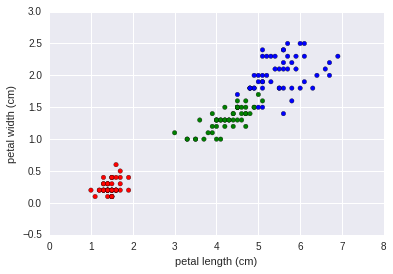

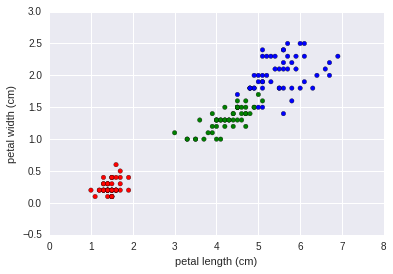

In [4]:
iris = datasets.load_iris()
irisdf = pd.DataFrame(iris.data, columns=iris.feature_names)
irisdf['target'] = iris.target
cmap = {'0': 'r', '1': 'g', '2': 'b' }
irisdf['ctarget'] = irisdf.target.apply(lambda x: cmap[str(x)])
irisdf.plot('petal length (cm)', 'petal width (cm)', kind='scatter', c=irisdf.ctarget)
print irisdf.plot('petal length (cm)', 'petal width (cm)', kind='scatter', c=irisdf.ctarget)
print irisdf.describe()

def my_classifier(row):
    if row['petal length (cm)'] < 2:
        return 0
    else:
        return 1

predictions = irisdf.apply(my_classifier, axis=1)

In [5]:
irisdf['predictions'] = predictions

print float(len(irisdf[irisdf.target == irisdf.predictions])) / len(irisdf)

0.666666666667


### Starter Code

Work on improving the classifier below.

In [ ]:
def my_classifier(row):
    if row['petal length (cm)'] < 2:
        return 0
    else:
        return 2

predictions = irisdf.apply(my_classifier, axis=1)

irisdf['predictions'] = predictions

print float(len(irisdf[irisdf.target == irisdf.predictions])) / len(irisdf)

### Using distance: KNN implementation

In [ ]:
from sklearn import datasets, neighbors, metrics
import pandas as pd

iris = datasets.load_iris()
# n_neighbors is our option in KNN. We'll tune this value to attempt to improve our prediction.
knn = neighbors.KNeighborsClassifier(n_neighbors=5, weights='uniform')
knn.fit(iris.data[:,2:], iris.target)
print knn.predict(iris.data[:,2:])
print iris.target

print knn.score(iris.data[:,2:], iris.target)

Do we see a change in performance when using the distance weight?

In [ ]:
knn = neighbors.KNeighborsClassifier(n_neighbors=5, weights='') # add in the weights parameter here
knn.fit(iris.data[:,2:], iris.target)
print knn.predict(iris.data[:,2:])
print iris.target

print knn.score(iris.data[:,2:], iris.target)

### Solution to solving K

This is only one approach to the problem, but adding in the 'distance' parameter (instead of uniform) would only be additive. Note the code would need some editing to handle it properly if done in the grid search; alternatively, make the change directly in the estimator.

In [ ]:
from sklearn import grid_search, cross_validation
import matplotlib.pyplot as plt

# some n_list! keep in mind cross validation
# recall: what's an effective way to create a numerical list in python?
kf = cross_validation.KFold(len(irisdf), n_folds = 5)
gs = grid_search.GridSearchCV(
    estimator=neighbors.KNeighborsClassifier(),
    param_grid={'',
    cv=kf,
)
gs.fit(iris.data, iris.target)
gs.grid_scores_